# Aluno: Felipe de Jesus Araujo da Conceição - DRE: 119180575

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração da máquina (MacBook Pro M3 2023)

* Quantidade total de núcleos: 12
* Quantidade total de threads: 12



# Informações sobre os dados na tabela

* Quantidade de threads (Em que 0 signfica sequencial)
* Dimensões das matrizes
* Tempo de inicialização
* Tempo de processamento (apenas multiplicação de matriz)
* Tempo de finalização



In [22]:
# Carrega o arquivo com tempos de execução
nomes_das_colunas = ['Quantidade de threads', 'Dimensões das matrizes', 'Tempo de inicialização', "Tempo de Processamento", "Tempo de finalização"]
df = pd.read_csv("/content/drive/MyDrive/ProgConc/temposExecucao.csv", header=None, names=nomes_das_colunas)
df

,Quantidade de threads,Dimensões das matrizes,Tempo de inicialização,Tempo de Processamento,Tempo de finalização
0,0,500,0.001186,0.310951,0.002246
1,0,500,0.000241,0.324474,0.001136
2,0,500,0.000231,0.306925,0.001479
3,0,500,0.000253,0.332067,0.002086
4,0,500,0.000259,0.312965,0.000297
...,...,...,...,...,...
70,8,2000,0.007986,4.581733,0.004126
71,8,2000,0.005212,4.395898,0.003087
72,8,2000,0.003573,4.331167,0.003145
73,8,2000,0.005953,4.522541,0.002900


# Médias dos tempos de execução(em segundos) para as threads e as dimensões
### OBS.: Quantidade de threads 0 faz referencia ao sequencial

In [5]:
df_medias = df.groupby(["Quantidade de threads", "Dimensões das matrizes"]).median()
df_medias

Tempo de inicialização  \
Quantidade de threads Dimensões das matrizes                           
0                     500                                   0.000253   
                      1000                                  0.000951   
                      2000                                  0.021734   
1                     500                                   0.000244   
                      1000                                  0.000983   
                      2000                                  0.022021   
2                     500                                   0.000259   
                      1000                                  0.001092   
                      2000                                  0.010535   
4                     500                                   0.000250   
                      1000                                  0.000941   
                      2000                                  0.006034   
8                     500                                   0.000268   
                      1000                                  0.001163   
                      2000                                  0.005212   

                                              Tempo de Processamento  \
Quantidade de threads Dimensões das matrizes                           
0                     500                                   0.312965   
                      1000                                  2.768062   
                      2000                                 24.796135   
1                     500                                   0.352430   
                      1000                                  2.843199   
                      2000                                 28.825046   
2                     500                                   0.181145   
                      1000                                  1.485681   
                      2000                                 13.670244   
4                     500                                   0.093091   
                      1000                                  0.741677   
                      2000                                  6.989204   
8                     500                                   0.062336   
                      1000                                  0.513900   
                      2000                                  4.437305   

                                              Tempo de finalização  
Quantidade de threads Dimensões das matrizes                        
0                     500                                 0.001479  
                      1000                                0.001943  
                      2000                                0.005035  
1                     500                                 0.000608  
                      1000                                0.001008  
                      2000                                0.005659  
2                     500                                 0.000592  
                      1000                                0.001061  
                      2000                                0.004734  
4                     500                                 0.001388  
                      1000                                0.001163  
                      2000                                0.003694  
8                     500                                 0.000795  
                      1000                                0.001200  
                      2000                                0.003130

# Graficos

### Aceleração

In [7]:
# Função para calcular a aceleração
def calc_aceleracao(row):
    dim = row.name[1]
    return df_medias.loc[0, dim]["Tempo de Processamento"] / row["Tempo de Processamento"]

# Aplicar a função de aceleração para todas as combinações de Threads e Dim (exceto sequencial)
df_medias['Aceleracao'] = df_medias.apply(calc_aceleracao, axis=1)

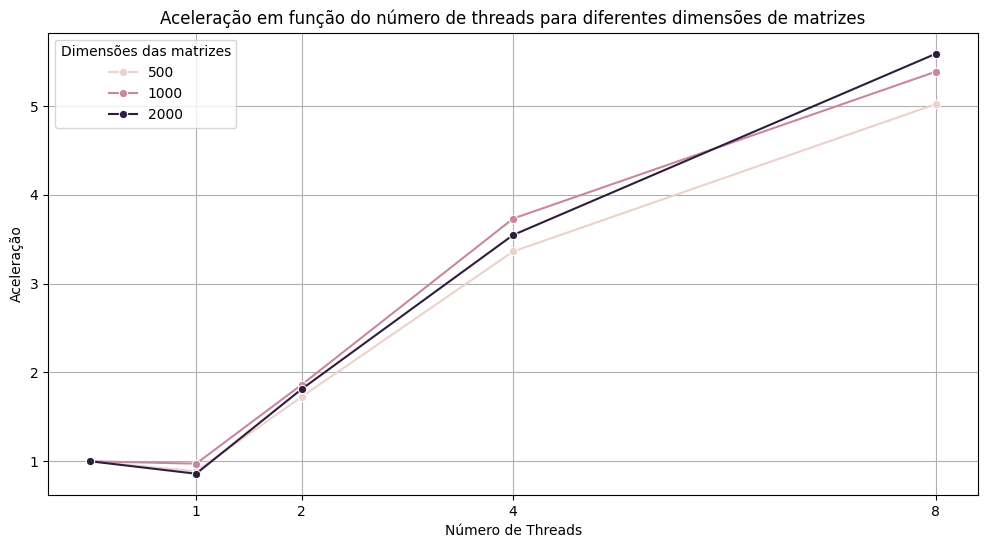

In [15]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de threads', y='Aceleracao', hue='Dimensões das matrizes', marker='o')

# Configurações do gráfico
plt.title('Aceleração')
plt.xlabel('Número de Threads')
plt.ylabel('Aceleração')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()

### Eficiência

In [19]:
# Função para calcular a eficiência
def calc_efic(row):
    th = row.name[0]
    if th == 0:
        return 1
    return row["Aceleracao"] / th

In [20]:
# Aplicar a função de eficiência
df_medias['Eficiencia'] = df_medias.apply(calc_efic, axis=1)

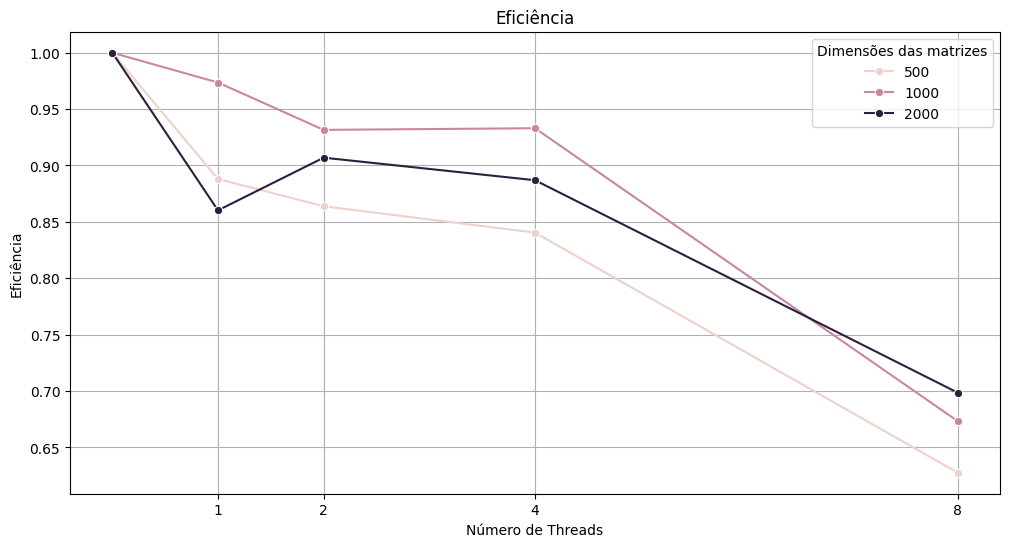

In [21]:
# Criar o gráfico de linhas com o Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de threads', y='Eficiencia', hue='Dimensões das matrizes', marker='o')

# Configurações do gráfico
plt.title('Eficiência')
plt.xlabel('Número de Threads')
plt.ylabel('Eficiência')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()